In [2]:
#goal: create word vectors from a game of thrones dataset
#and analyze them to see semantic similarity

#step 0 - import dependencies

from __future__ import absolute_import, division, print_function

#for word encoding
import codecs

#regex
import glob

#concurrency
import multiprocessing

#dealing with operations system, like reading a file
import os

#pretty printing, human readable
import pprint

#regular expression
import re

#natural langauge toolkit
import nltk

#word 2 vec
import gensim.models.word2vec as w2v

#dimensionality reduction
import sklearn.manifold

#math
import numpy as np

#plotting
import matplotlib.pyplot as plt

#parse pandas as pd
import pandas as pd

#visualization
import seaborn as sns

c:\users\vortex\appdata\local\programs\python\python35\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
#step 1 - process our data
#clean data
nltk.download('punkt') #pretrained tokenizer
nltk.download('stopwords') #words like and, the, an, a, of

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vortex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vortex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#get the book names, matching txt file
book_filenames = sorted(glob.glob('got/*.txt'))
book_filenames

['got\\got1.txt',
 'got\\got2.txt',
 'got\\got3.txt',
 'got\\got4.txt',
 'got\\got5.txt']

In [5]:
#add all books to a single string
corpus_raw = u''
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, 'r', 'utf-8') as book_file:
        corpus_raw += book_file.read()
    print('Corpus is now {0} characters long'.format(len(corpus_raw)))
    print()

Reading 'got\got1.txt'...
Corpus is now 1770659 characters long

Reading 'got\got2.txt'...
Corpus is now 4071041 characters long

Reading 'got\got3.txt'...
Corpus is now 6391405 characters long

Reading 'got\got4.txt'...
Corpus is now 8107945 characters long

Reading 'got\got5.txt'...
Corpus is now 9719485 characters long



In [6]:
#split the corpus into sentences
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

#tokenize all the words in our corpus into sentence tokens
raw_sentences = tokenizer.tokenize(corpus_raw)

#convert into a list of words
#remove unnecessary characters, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub('[^a-zA-Z]', ' ', raw)
    words = clean.split()
    return words

#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [7]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,818,103 tokens


In [8]:
#step 3 - build model

#train word2vec

#once we have vectors

#vector is a type of tensor

#3 main tasks that vectors help with
# - distance
# - similarity
# - ranking

#dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300

#minimum word count threshold.
min_word_count = 3

#number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

#context window length
context_size = 7

#downsampling setting for freq words
downsampling = 1e-3

#seed for the rng, to make the results reproducible
#random number generator
#deterministic = good for debugging
seed = 1

In [11]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [12]:
#build our model
thrones2vec.build_vocab(sentences)

In [13]:
print("Word2Vec vocabulary length:", len(thrones2vec.vocab))

Word2Vec vocabulary length: 17277


In [15]:
thrones2vec.train(sentences)

7021213

In [16]:
if not os.path.exists('trained'):
    os.makedirs('trained')

In [17]:
thrones2vec.save(os.path.join('trained', 'thrones2vec.w2v'))

In [18]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))

In [19]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [20]:
all_word_vectors_matrix = thrones2vec.syn0

In [21]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [22]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            for word in thrones2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [23]:
points.head(10)

,word,x,y
0,CLUBFOOT,4.968506,-2.407745
1,sheepish,-4.012208,-4.046915
2,turnpike,0.730572,2.122915
3,Mylenda,3.780233,-1.172837
4,crossbowman,-4.532919,-0.766705
5,nearsighted,-4.053203,-2.913987
6,moth,0.307093,1.187305
7,SELYSE,3.225908,-2.642655
8,popped,-2.701373,2.359245
9,EMMETT,3.961897,-3.630587


In [24]:
sns.set_context('poster')

In [25]:
points.plot.scatter('x', 'y', s=10, figsize=(20, 12))

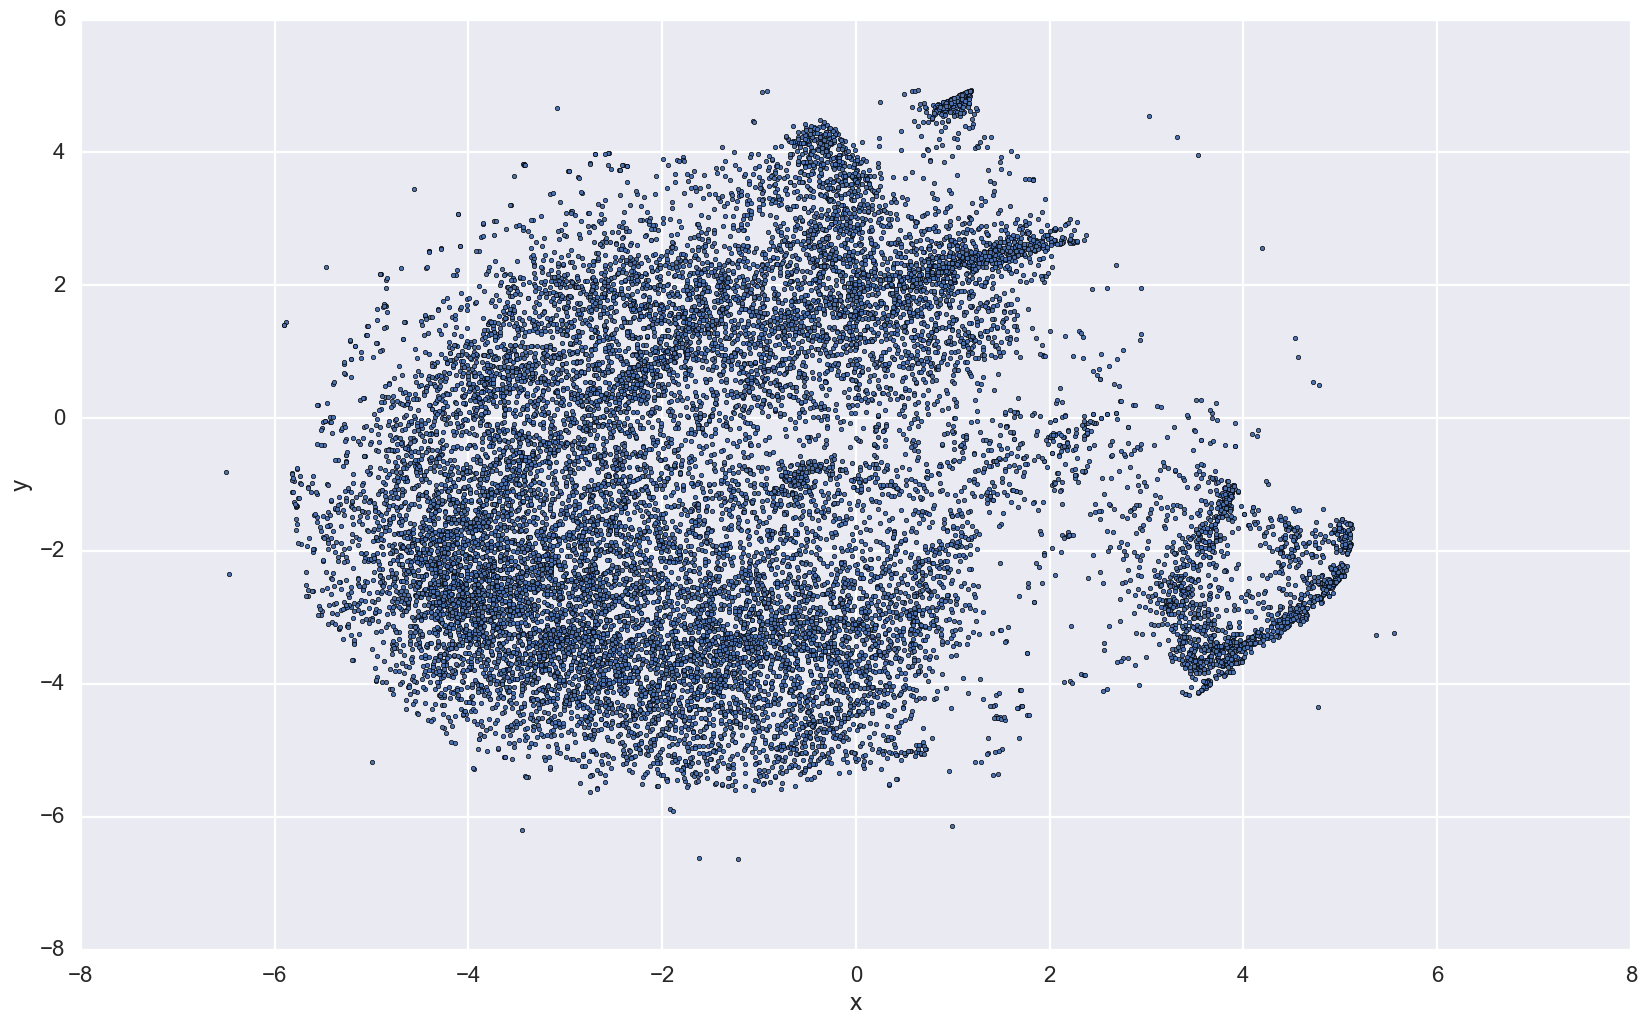

In [29]:
plt.show()

In [30]:
thrones2vec.most_similar("Stark")

[('Eddard', 0.6350842714309692),
 ('executed', 0.5222312211990356),
 ('Lyanna', 0.4988824129104614),
 ('Winterfell', 0.49849072098731995),
 ('fishwife', 0.49210798740386963),
 ('divulge', 0.4873826503753662),
 ('beheaded', 0.4840577244758606),
 ('Edrick', 0.481486439704895),
 ('SHIREI', 0.48019707202911377),
 ('Underfoot', 0.47083982825279236)]

In [38]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [45]:
plot_region(x_bounds=(0, 1), y_bounds=(4, 4.5))

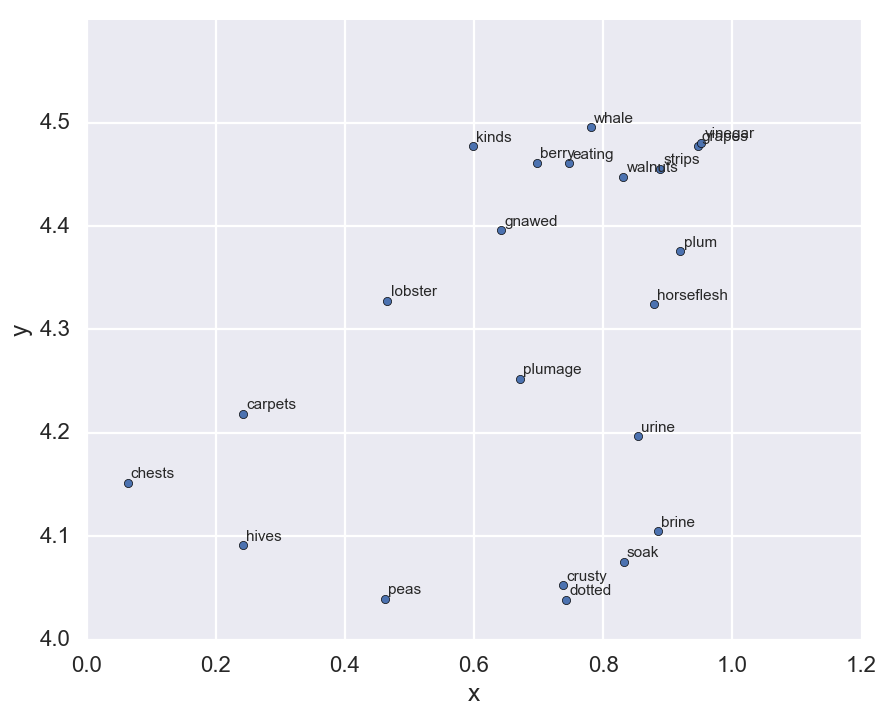

In [43]:
plt.show()

In [46]:
thrones2vec.most_similar("direwolf")

[('wolf', 0.5951207876205444),
 ('pup', 0.5705146789550781),
 ('SHAGGYDOG', 0.5579670667648315),
 ('Ghost', 0.5480514764785767),
 ('GHOST', 0.5242560505867004),
 ('muzzle', 0.5130282640457153),
 ('snarling', 0.49676796793937683),
 ('RICKON', 0.4926302433013916),
 ('scouting', 0.4890630841255188),
 ('OSHA', 0.4855855107307434)]